In [1]:
from netCDF4 import Dataset
from ncdump import ncdump
import numpy as np
import pandas as pd
import xarray as xr
import json

#for plotting
import hvplot.xarray # fancy plotting for xarray
import holoviews as hv
import matplotlib.pyplot as plt

#for stats
import statistics
from statistics import mean, median, mode, stdev, median_high

#for datetime
import datetime
from datetime import datetime as dt
import matplotlib.dates as mdates
from matplotlib.dates import date2num

#for cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature

In [2]:
#open flexpart output netcdf file
nc_file = '/home/macc/flexpart10.4/flexpart_v10.4_3d7eebf/src/exercises/LNOx_plumes/10j_output/grid_time_20150525201100.nc'
df = Dataset(nc_file, mode='r')

In [ ]:
ncdump(df)

In [3]:
#set up and fill variables
time = df.variables['time'][:]
lons = df.variables['longitude'][:]
lats = df.variables['latitude'][:]
hgt = df.variables['height'][:]
relcom = df.variables['RELCOM'][:]
rellng1 = df.variables['RELLNG1'][:]
rellng2 = df.variables['RELLNG2'][:]
rellat1 = df.variables['RELLAT1'][:]
rellat2 = df.variables['RELLAT2'][:]
relzz1 = df.variables['RELZZ1'][:]
relzz2 = df.variables['RELZZ2'][:]
relkindz = df.variables['RELKINDZ'][:]
relstart = df.variables['RELSTART'][:]
relend = df.variables['RELEND'][:]
relpart = df.variables['RELPART'][:]
relxmass = df.variables['RELXMASS'][:]
lage = df.variables['LAGE'][:]
oro = df.variables['ORO'][:]
spec = df.variables['spec001_mr'][:]

In [4]:
print(len(time), time.shape)
print(len(lons), lons.shape)
print(len(lats), lats.shape)
print(len(hgt), hgt.shape)
print(len(relcom), relcom.shape)
print(len(lage), lage.shape)
print(len(oro), oro.shape)
print(len(spec), spec.shape)

84 (84,)
360 (360,)
180 (180,)
12 (12,)
8 (8, 45)
1 (1,)
180 (180, 360)
1 (1, 8, 84, 12, 180, 360)


In [5]:
#create dictionaries
dlons = {}
dlats = {}
dspec = {}
print(len(time))
for i in range(len(time)):
    dlons[ "data_lons_" + str( i ) ] = []
    dlats[ "data_lats_" + str( i ) ] = []
    dspec[ "data_spec_" + str( i ) ] = []


84


In [6]:
#val = spec[0, 0, 1, 1, 1, 1]
#print(val)
print(len(time))
for l in range(len(time)): 
    for k in range(len(hgt)):
        for j in range(len(lats)):
            for i in range(len(lons)): 
                    list(dlons.values())[l].append(lons[i])
                    list(dlats.values())[l].append(lats[j])
                    list(dspec.values())[l].append(spec[:, [0], [l], [k], [j], [i]])

84


In [34]:
#create array of time, altitude, max_spec and sum_spec and mean_spec (1008 by 5 array)

t = []
h = []
max_s = []
sum_s = []
av_s = []

max_spec=0
sum_spec=0
mean_spec=0
for l in range(len(time)): 

    for k in range(len(hgt)):
        count = 0
        max_spec=0
        sum_spec=0
        mean_spec=0
        temp_list = []
        for j in range(len(lats)):
            for i in range(len(lons)): 
                #if spec[:, [0], [l], [k], [j], [i]]>0:
                val = spec[0, 0, l, k, j, i]
                #print("val is ", val)
                temp_list.append(val)
                #if max_spec < val:
                 #   max_spec = val
                    #print()
                #sum_spec += val 
                #count +=1
                #mean_spec = sum_spec/count
        max_spec = max(temp_list)
        #print(max_spec)
        sum_spec = sum(temp_list)
        mean_spec = sum_spec/(len(temp_list))
        #print(time[l], hgt[k], max_spec, sum_spec, mean_spec)
        temp_t = -3 * l
        #print(temp_t)
        t.append(temp_t)
        h.append(hgt[k])
        max_s.append(max_spec)
        #print(max_s)
        sum_s.append(sum_spec)
        av_s.append(mean_spec)
        data = time[l], hgt[k], max_spec, sum_spec, mean_spec
                    #list(dlons.values())[l].append(lons[i])
                    #list(dlats.values())[l].append(lats[j])
                    #list(dspec.values())[l].append(spec[:, [0], [l], [k], [j], [i]])
            

In [10]:
#plot where the plumes originate from....

t = []
h = []
max_s = []
max_long = []
max_lat = []
sum_s = []
av_s = []

max_spec=0
sum_spec=0
mean_spec=0
for l in range(49,66): #for this time range find max spec for all altitude and 
    #then their corresponding latitude and longitude

    for k in range(len(hgt)):
        count = 0
        max_spec=0
        sum_spec=0
        mean_spec=0
        temp_list = []
        for j in range(len(lats)):
            for i in range(len(lons)): 
                if spec[:, [0], [l], [k], [j], [i]]>0:
                    val = spec[0, 0, l, k, j, i]
                #print("val is ", val)
                ##temp_list.append(val)
                    if max_spec < val:
                        max_spec = val
                        m_long = lons[i]
                        m_lat = lats[j] 
                    #print()
                #sum_spec += val 
                #count +=1
                #mean_spec = sum_spec/count
        #max_spec = max(temp_list)
        #print(max_spec)
        #sum_spec = sum(temp_list)
        #mean_spec = sum_spec/(len(temp_list))
        #print(time[l], hgt[k], max_spec, sum_spec, mean_spec)
        temp_t = -3 * l
        #print(temp_t)
        t.append(temp_t)
        h.append(hgt[k])
        max_s.append(max_spec)
        max_lat.append(m_lat)
        max_long.append(m_long)
        #print(max_s)
        #sum_s.append(sum_spec)
        #av_s.append(mean_spec)
        #data = time[l], hgt[k], max_spec, sum_spec, mean_spec
                    #list(dlons.values())[l].append(lons[i])
                    #list(dlats.values())[l].append(lats[j])
                    #list(dspec.values())[l].append(spec[:, [0], [l], [k], [j], [i]])
            

In [ ]:
print(len(max_s))
print(len(max_lat))
print(len(max_long))
#for i in range(len(max_s)):
for i in range(96,203):     
    print(max_s[i], max_long[i], max_lat[i]
         )
    

<Figure size 432x288 with 0 Axes>

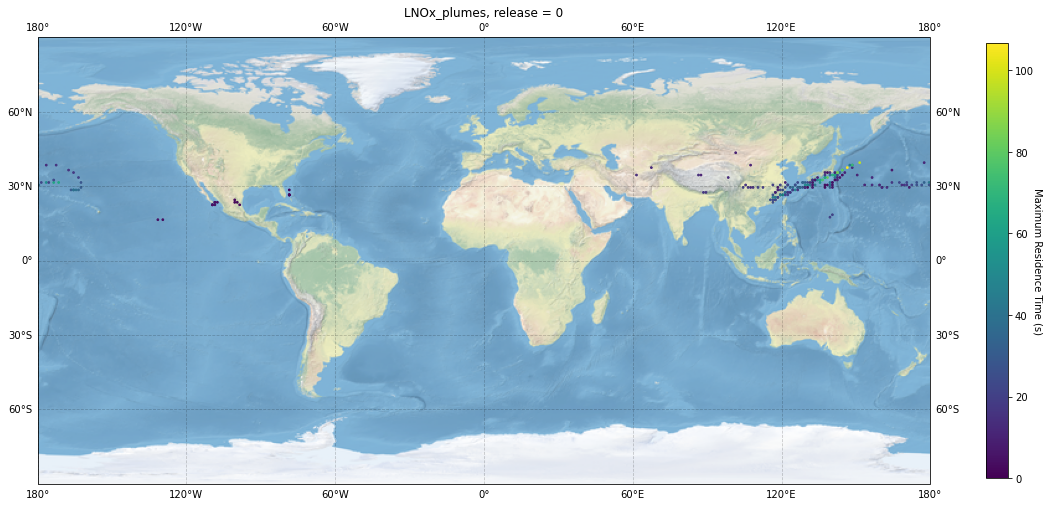

In [30]:
#plot the max values (spec, lat, long) for this time range (49-66)

ccrs.PlateCarree()
plt.figure()
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())   
ax.gridlines(draw_labels=True, color='black', alpha=0.2, linestyle='--')
ax.stock_img()

#for l in range(len(time)):
#    vallons = list(dlons.values())[l]
#    vallats = list(dlats.values())[l]
#    valspec = list(dspec.values())[l]
#for i in range(len(max_s)):    
#for i in range(96,203):     
    #cb = ax.scatter(max_long[i], max_lat[i], c=max_s[i], s = max_s[i])
#    print(max_s[i])
#cmaps='magma' 
cb = ax.scatter(max_long, max_lat, c=max_s, s = 3)
ax.set_aspect('equal', adjustable='box')
#plt.set_cmap('bwr')
cf = plt.colorbar(cb, shrink=.4) 

plt.title("LNOx_plumes, release = 0")
cf.set_label('Maximum Residence Time (s)', rotation=270, labelpad=8)    
plt.savefig("plots/LNOx_plumes/pos.png")
plt.show()
    


In [ ]:
#look at all releases at once....

t = []
h = []
max_s = []
max_long = []
max_lat = []
sum_s = []
av_s = []

max_spec=0
sum_spec=0
mean_spec=0
m_lat=0
m_long=0
for l in range(len(time)): 
    for k in range(len(hgt)):
        count = 0
        max_spec=0
        sum_spec=0
        mean_spec=0
        temp_list = []
        for m in range(len(relcom)):
            for j in range(len(lats)):
                for i in range(len(lons)): 
                    if spec[:, [0], [l], [k], [j], [i]]>0:
                        val = spec[0, m, l, k, j, i]
                #print("val is ", val)
                        if max_spec < val:
                            max_spec = val
                            m_long = lons[i]
                            m_lat = lats[j] 

        temp_t = -3 * l
    #print(temp_t)
        t.append(temp_t)
        h.append(hgt[k])
        max_s.append(max_spec)
        max_lat.append(m_lat)
        max_long.append(m_long)
           

In [ ]:
print(len(t))
print(len(h))
print(len(max_s))
print(len(sum_s))
print(len(av_s))
print(t)
print(h)
print(max_s)
print(sum_s)
print(av_s)
#print(data[0], data[1], data[2], data[3], data[4])
#print(data)

In [ ]:
cmap = plt.get_cmap('PiYG')
#norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0) = plt.subplots()

im = ax0.pcolormesh(t, h, max_s, cmap=cmap)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')

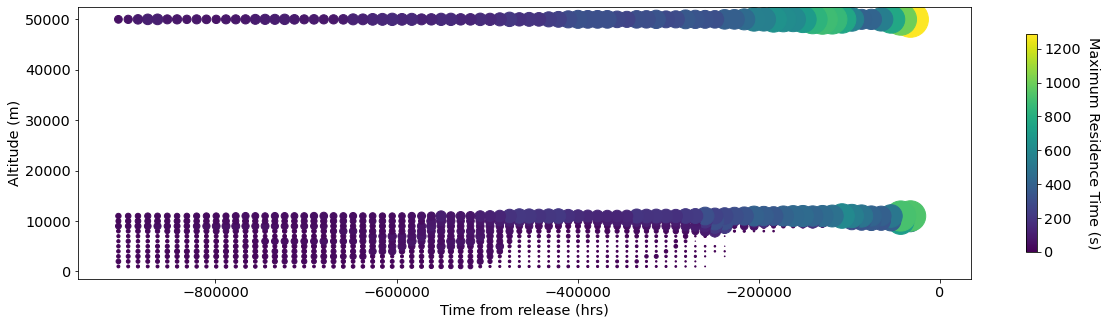

<Figure size 1440x360 with 0 Axes>

In [9]:
#Plot of full colonne
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)#fig, ax1 = plt.subplots()

ax = plt.axes()
#ax.set_ylim([0, 12000]) #Only plot troposphere
#cb = ax.scatter(t, h, c=max_s)
#ax.set_aspect('equal', adjustable='box')    
#plt.colorbar(cb, shrink=.4)     
#ax.pcolormesh(t, h, max_s)
cb = ax.scatter(t, h, s = max_s, c = max_s);
cf=plt.colorbar(cb, shrink=.8)#ax.hist3d(t, h, max_s);
cf.set_label('Maximum Residence Time (s)', rotation=270, labelpad=20)    
ax.set_ylabel('Altitude (m)')
ax.set_xlabel('Time from release (hrs)')
plt.savefig("plots/LNOx_plumes/all.png")
plt.show()
plt.clf()


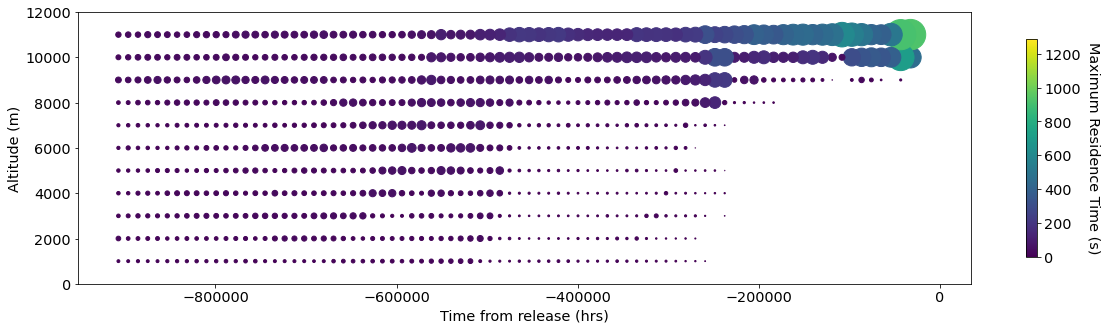

<Figure size 1440x360 with 0 Axes>

In [10]:
#Plot of full colonne
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)#fig, ax1 = plt.subplots()

ax = plt.axes()
ax.set_ylim([0, 12000]) #Only plot troposphere
#cb = ax.scatter(t, h, c=max_s)
#ax.set_aspect('equal', adjustable='box')    
#plt.colorbar(cb, shrink=.4)     
#ax.pcolormesh(t, h, max_s)
cb = ax.scatter(t, h, s = max_s, c = max_s);
cf=plt.colorbar(cb, shrink=.8)#ax.hist3d(t, h, max_s);
ax.set_ylabel('Altitude (m)')
cf.set_label('Maximum Residence Time (s)', rotation=270, labelpad=20)    
ax.set_xlabel('Time from release (hrs)')
plt.savefig("plots/LNOx_plumes/1to12km.png")
plt.show()
plt.clf()

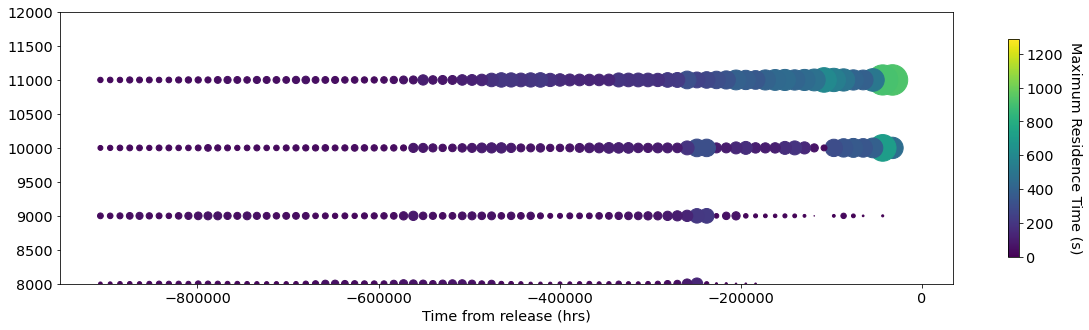

<Figure size 1440x360 with 0 Axes>

In [11]:
#Plot of upper troposphere 8 - 12 km
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)#fig, ax1 = plt.subplots()

ax = plt.axes()
ax.set_ylim([8000, 12000]) #Only plot troposphere
#ax.scatter(t, h, max_s);
cb = ax.scatter(t, h, s = max_s, c = max_s);
cf=plt.colorbar(cb, shrink=.8)#ax.hist3d(t, h, max_s);ax.set_ylabel('Altitude (m)')
cf.set_label('Maximum Residence Time (s)', rotation=270, labelpad=20)
ax.set_xlabel('Time from release (hrs)')
plt.savefig("plots/LNOx_plumes/8to12km.png")
plt.show()
plt.clf()

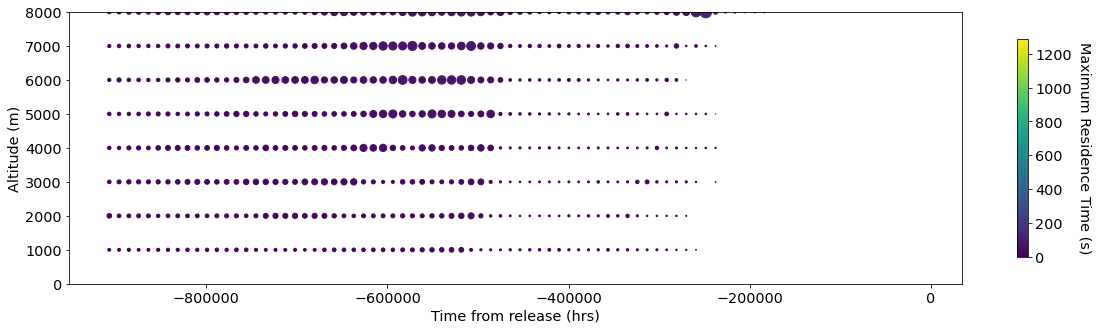

<Figure size 1440x360 with 0 Axes>

In [12]:
#Plot of surface to 8km
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)#fig, ax1 = plt.subplots()

ax = plt.axes()
ax.set_ylim([0, 8000]) #Only plot troposphere
#ax.scatter(t, h, max_s);
cb = ax.scatter(t, h, s = max_s, c = max_s);
cf=plt.colorbar(cb, shrink=.8)#ax.hist3d(t, h, max_s);
cf.set_label('Maximum Residence Time (s)', rotation=270, labelpad=20)
ax.set_ylabel('Altitude (m)')
ax.set_xlabel('Time from release (hrs)')
plt.savefig("plots/LNOx_plumes/0to8km.png")
plt.show()
plt.clf()

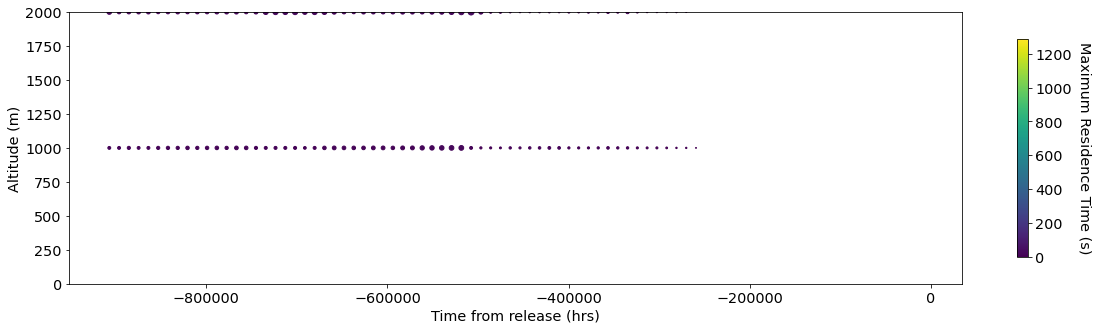

<Figure size 1440x360 with 0 Axes>

In [13]:
#Plot of surface to 2km
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)#fig, ax1 = plt.subplots()

ax = plt.axes()
ax.set_ylim([0, 2000]) #Only plot troposphere
#ax.scatter(t, h, max_s);
cb = ax.scatter(t, h, s = max_s, c = max_s);
cf=plt.colorbar(cb, shrink=.8)#ax.hist3d(t, h, max_s);
cf.set_label('Maximum Residence Time (s)', rotation=270, labelpad=20)
ax.set_ylabel('Altitude (m)')
ax.set_xlabel('Time from release (hrs)')
plt.savefig("plots/LNOx_plumes/0to2km.png")
plt.show()
plt.clf()

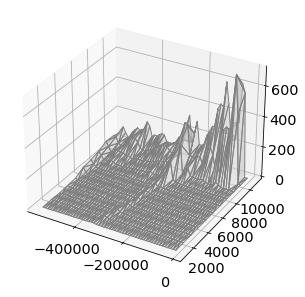

In [129]:
# Plot X,Y,Z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(t, h, max_s, color='white', edgecolors='grey', alpha=0.5)
#ax.scatter(t, h, max_s, c='red')
plt.show()

In [16]:
ccrs.PlateCarree()
plt.figure()
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())   
ax.gridlines(draw_labels=True, color='black', alpha=0.2, linestyle='--')
ax.stock_img()

for l in range(len(time)):
    vallons = list(dlons.values())[l]
    vallats = list(dlats.values())[l]
    valspec = list(dspec.values())[l]
    
    cb = ax.scatter(vallons, vallats, c=valspec, s = 0.8)
cmaps='magma'    
ax.set_aspect('equal', adjustable='box')
#plt.set_cmap('bwr')
plt.colorbar(cb, shrink=.4) 
plt.title("LNOx_plumes, release = 0")
    
#plt.savefig("plots/LNOx_plumes/time_"+str(l)+".png")
plt.show()
    

KeyboardInterrupt: 

<Figure size 1440x360 with 0 Axes>

Error in callback <function flush_figures at 0x2b3da26377b8> (for post_execute):


KeyboardInterrupt: 

In [ ]:
import matplotlib.animation as animation

fig, ax = make_figure()

frames = len(time)        # Number of frames

def draw(frame, add_colorbar):
    grid = area[frame]
    ax = plt.axes(projection=ccrs.PlateCarree())  
    #contour = grid.plot(ax=ax, transform=ccrs.PlateCarree(),
                        add_colorbar=add_colorbar)
    title = u"%s — %s" % (ds.t2m.long_name, str(area.time[frame].values)[:19])
    ax.set_title(title)
    return contour


def init():
    return draw(0, add_colorbar=True)


def animate(frame):
    return draw(frame, add_colorbar=False)


ani = animation.FuncAnimation(fig, animate, frames, interval=0.01, blit=False,
                              init_func=init, repeat=False)
ani.save('images/temperature_ei_an_2017.mp4', writer=animation.FFMpegWriter(fps=8))
plt.close(fig)

In [ ]:
for l in range(len(time)):
    vallons = list(dlons.values())[l]
    #print(vallons)
    vallats = list(dlats.values())[l]
    #print(vallats)
    valspec = list(dspec.values())[l]
    #print(valspec)
    ccrs.PlateCarree()
    plt.figure()
    fig = plt.figure(figsize=(20,20))
    ax = plt.axes(projection=ccrs.PlateCarree())

    #ax.set_extent([-25, 25, 40, 70])
    
    ax.gridlines(draw_labels=True, color='black', alpha=0.2, linestyle='--')
    ax.stock_img()
    cb = ax.scatter(vallons, vallats, c=valspec, s = 0.5)
    
    #cb = ax.scatter(lons[0:100], lats[0:100], spec[0:100], s = 0.5, vmin=5, vmax=25)
    ax.set_aspect('equal', adjustable='box')    
    plt.colorbar(cb, shrink=.4) 
    plt.title("LNOx_plumes time = "+str(l)+", release = 0")
    #plt.title("LNOx_plumes_time = "+str(l))
    plt.savefig("plots/LNOx_plumes/time_"+str(l)+".png")
    plt.show()
    #plt.title("LNOx_plumes_time = "+str(l))
    
    

AttributeError: 'PathCollection' object has no attribute 'plot'

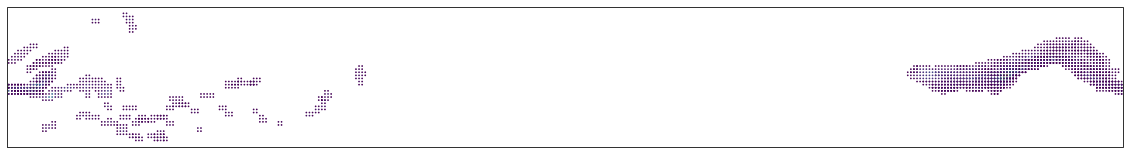

In [11]:
# Setup the initial plot
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set up levels etc in this call
#image = variable.isel(time = 0).plot.imshow(ax=ax, transform=ccrs.PlateCarree(), animated=True)
image = ax.scatter(vallons, vallats, c=valspec, s = 0.5).plot.imshow(ax=ax, transform=ccrs.PlateCarree(), animated=True)
# Set up static features - coastlines, political borders etc.
ax.stock_img()
#cb = ax.scatter(vallons, vallats, c=valspec, s = 0.5) #there are the two lines I added....
#plt.colorbar(cb, shrink=0.4) 

def update(t):
    # Update the plot for a specific time
    print(t)
    ax.set_title("time = %s"%t)
    image.set_array(variable.sel(time=t))
    return image,

# Run the animation, applying `update()` for each of the times in the variable
animation = anim.FuncAnimation(fig, update, frames=variable.time.values, blit=False)

# Save to file or display on screen
#animation.save('tasmax.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()


SyntaxError: 'return' outside function (<ipython-input-31-69740a47ed67>, line 13)

<Figure size 432x288 with 0 Axes>

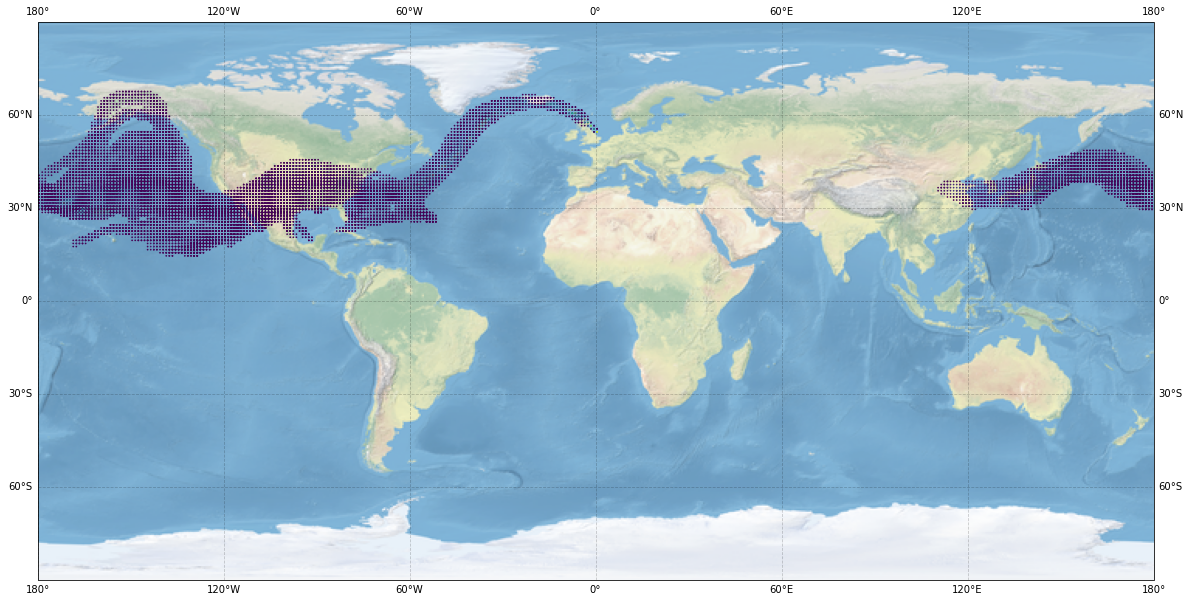

In [31]:
_, ax = make_figure()
# plot the temperature field
#grid = area.sel(time='2017-01-01T12:00:00')
#grid.plot(ax=ax, transform=ccrs.PlateCarree());

    
    cb = ax.scatter(vallons, vallats, c=valspec, s = 0.5)
return fig, ax

make_figure();


In [32]:
import matplotlib.animation as animation

fig, ax = make_figure()

frames = len(time)        # Number of frames

def draw(frame, add_colorbar):

    for l in range(len(time)):
        #vallons = list(dlons.values())[l]
    #print(vallons)
        #vallats = list(dlats.values())[l]
    #print(vallats)
        #valspec = list(dspec.values())[l]
        plt.figure()
        fig = plt.figure(figsize=(20, 20))
        ax = plt.axes(projection=ccrs.PlateCarree())

    # generate a basemap with country borders, oceans and coastlines
        ax.gridlines(draw_labels=True, color='black', alpha=0.2, linestyle='--')
        ax.stock_img()
        cb = ax.scatter(list(dlons.values())[l], list(dlats.values())[l], c=list(dspec.values())[l], s = 0.5)
        ax.set_aspect('equal', adjustable='box')    
        plt.colorbar(cb, shrink=.4) 
    return fig, ax

def init():
    return draw(0, add_colorbar=True)


def animate(frame):
    return draw(frame, add_colorbar=False)


ani = animation.FuncAnimation(fig, animate, frames, interval=1, blit=False,
                              init_func=init, repeat=False)
#ani.save('images/temperature_ei_an_2017.mp4', writer=animation.FFMpegWriter(fps=8))
plt.close(fig)

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.animation as animation

fig, ax = make_figure()

frames = area.time.size        # Number of frames
min_value = area.values.min()  # Lowest value
max_value = area.values.max()  # Highest value


def draw(frame, add_colorbar):
    grid = area[frame]
    contour = grid.plot(ax=ax, transform=ccrs.PlateCarree(),
                        add_colorbar=add_colorbar, vmin=min_value, vmax=max_value)
    title = u"%s — %s" % (ds.t2m.long_name, str(area.time[frame].values)[:19])
    ax.set_title(title)
    return contour


def init():
    return draw(0, add_colorbar=True)


def animate(frame):
    return draw(frame, add_colorbar=False)


ani = animation.FuncAnimation(fig, animate, frames, interval=0.01, blit=False,
                              init_func=init, repeat=False)
ani.save('images/temperature_ei_an_2017.mp4', writer=animation.FFMpegWriter(fps=8))
plt.close(fig)


In [ ]:
df.close()